In [3]:
# press ctrl+enter to run the command in any cell... 
# from the top menu you can choose 'cell' -> 'run all'
import pandas as pd
import sqlalchemy as sql
from sqlalchemy import create_engine
import pymysql as mysql
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import approximation as approx

In [4]:
areaC_all = pd.read_csv("https://raw.githubusercontent.com/ropitz/gabii_experiments/master/su_matrix_C_all.csv")
areaC_all

,MATRIX_FROM_ID,MATRIX_TO_ID,TYPE,TO_SU DEFINITION,EXCAV_YEAR
0,2009,2008,Cuts,Layer of rocks.,2009
1,2009,2010,Cuts,A layer of rocks.,2009
2,2009,2011,Cuts,Layer of brown silt.,2009
3,2009,2035,Cuts,Layer of paving stones,2009
4,2009,2038,Cuts,Layer of paving stones,2009
5,2009,2048,Cuts,Wall of irregular stones,2009
6,2009,2014,Cuts,Layer of silty clay.,2009
7,2044,2023,Cuts,Layer of paving stones,2009
8,2029,2026,Cuts,Opus signimun surface,2009
9,2030,2027,Cuts,Rectangular cut into opus signinum surface,2009


In [5]:
areaC_2018 = pd.read_csv("https://raw.githubusercontent.com/ropitz/gabii_experiments/master/su_matrix_C_2018.csv")
areaC_2018

,MATRIX_FROM_ID,MATRIX_TO_ID,TYPE,TO_SU DEFINITION,EXCAV_YEAR
0,2821,2822,Fills,"Circular cut NW of block 2436, filled by 2821",2018
1,2823,2837,Covers,Compact yellow-gray deposit with frequent crus...,2018
2,2830,2831,Fills,"Circular cut, filled by 2830. N of 2248",2018
3,2827,2832,Covers,Loose brown oval deposit in NE quadrant of are...,2018
4,2832,2835,Covers,Deposit of stones and ceramic within cut 2833,2018
5,2835,2833,Fills,"Oval cut in NE quadrant of area, filled by 283...",2018
6,2843,2846,Covers,"Compact, grey deposit in northwest corner of c...",2018
7,2839,2842,Covers,Compact grayish-yellow deposit with stone and ...,2018
8,2834,2843,Covers,Brown silty deposit with many rock inclusions ...,2018
9,2772,2826,Covers,Compact brown deposit along W Limit of courtyard,2018


In [6]:
areaC_2016_2018 = pd.read_csv("https://raw.githubusercontent.com/ropitz/gabii_experiments/master/su_matrix_C_2016_2018.csv")
areaC_2016_2018

,MATRIX_FROM_ID,MATRIX_TO_ID,TYPE,TO_SU DEFINITION,EXCAV_YEAR
0,2411,2502,Abuts,N-S wall of red tufo S. of wall 2501 and W. of...,2016
1,2411,2503,Abuts,N-S running wall S. of wall 2501 and E. of wal...,2016
2,2213,2504,Covers,Brown silty deposit in NW corner of area benea...,2016
3,2253,2506,Covers,Compact light brown deposit beneath floor 2253.,2016
4,2506,2510,Covers,Compact light brown deposit N. of wall 2240 in...,2016
5,2393,2513,Equals,"Linear feature of tufo and travertine, N. of 2...",2016
6,2394,2514,Equals,Linear feature of tufo N. of 2513 in Room 1,2016
7,2511,2512,Covers,Loose brown deposit between linear features 25...,2016
8,2510,2511,Covers,"Light grey compact deposit, N of wall 2240, in...",2016
9,2511,2518,Covers,"Compact light grey deposit N. of 2240, S. of ...",2016


In [7]:
# Build your graph
G_all=nx.from_pandas_edgelist(areaC_all,'MATRIX_FROM_ID', 'MATRIX_TO_ID','TYPE')
G_2018=nx.from_pandas_edgelist(areaC_2018,'MATRIX_FROM_ID', 'MATRIX_TO_ID','TYPE')
G_2016_2018=nx.from_pandas_edgelist(areaC_2016_2018,'MATRIX_FROM_ID', 'MATRIX_TO_ID','TYPE')

In [8]:
print(nx.info(G_all))
print(nx.is_connected(G_all))
components = nx.connected_components(G_all)
largest_component = max(components, key=len)
subgraph = G_all.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)
#repeat the same commands substituting "G_all" for "G_2018" or "G_2016_2018"

Name: 
Type: Graph
Number of nodes: 944
Number of edges: 1678
Average degree:   3.5551
False
Network diameter of largest component: 22


In [9]:
paths = nx.all_simple_paths(G_all, 2009,2023,cutoff=4)
# substitute the dataset you want (G_all; G_2018; G_2016_2018) and any two SUs you want where you see '2009,2023'.
# The cutoff is the largest number of steps allowed between those two SUs.

In [10]:
for path in nx.all_simple_paths(G_all, source=2009, target=2023,cutoff=5):
     print(path)

[2009, 2008, 2021, 2013, 2024, 2023]
[2009, 2008, 2048, 2072, 2024, 2023]
[2009, 2008, 2048, 2072, 2003, 2023]
[2009, 2011, 0, 2000, 2003, 2023]
[2009, 2011, 0, 2073, 2082, 2023]
[2009, 2011, 2033, 2000, 2003, 2023]
[2009, 2011, 2033, 2205, 2055, 2023]
[2009, 2035, 2016, 2000, 2003, 2023]
[2009, 2035, 2006, 2000, 2003, 2023]
[2009, 2035, 2074, 2054, 2055, 2023]
[2009, 2035, 2074, 2104, 2055, 2023]
[2009, 2035, 2147, 2184, 2055, 2023]
[2009, 2035, 2147, 2205, 2055, 2023]
[2009, 2038, 2004, 2000, 2003, 2023]
[2009, 2038, 2004, 2068, 2055, 2023]
[2009, 2038, 2067, 2060, 2024, 2023]
[2009, 2038, 2072, 2095, 2120, 2023]
[2009, 2038, 2072, 2024, 2023]
[2009, 2038, 2072, 2003, 2023]
[2009, 2038, 2072, 2070, 2024, 2023]
[2009, 2038, 2072, 2070, 2120, 2023]
[2009, 2038, 2072, 2070, 2122, 2023]
[2009, 2038, 2072, 2070, 2126, 2023]
[2009, 2038, 2017, 2055, 2023]
[2009, 2038, 2017, 2054, 2055, 2023]
[2009, 2038, 2048, 2072, 2024, 2023]
[2009, 2038, 2048, 2072, 2003, 2023]
[2009, 2038, 2046, 2044, 

In [11]:
for path in nx.all_shortest_paths(G_2018, source=2772, target=2935):
     print(path)
# As in this example, I am using the 2018 data

[2772, 2826, 2870, 2876, 2853, 2851, 2935]


In [12]:
A = nx.all_shortest_paths(G_all, source=2115, target=2162)
A
# get all the shortest paths in the graph between two SUs and save it to a variable for reuse later...

<generator object all_shortest_paths at 0x7f7580e3d7d8>

{2081: Text(0.284838,0.251832,'2081'),
 2115: Text(0.320174,0.206893,'2115'),
 2095: Text(0.234709,0.303756,'2095'),
 2162: Text(0.254943,0.388603,'2162'),
 2075: Text(0.272883,0.188309,'2075')}

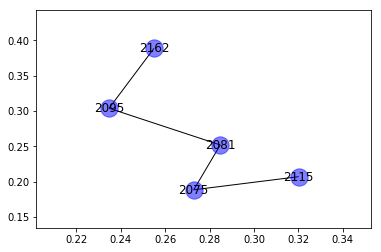

In [13]:
B = nx.dijkstra_path(G_all,source=2115, target=2162)
#Get a dijkstra style shortest path and save it to a variable
pos = nx.spring_layout(G_all)
nx.draw_networkx_nodes(G_all, pos=pos, nodelist = B, node_color = 'b', alpha = 0.5)
h = G_all.subgraph(B)
nx.draw_networkx_edges(G_all,pos=pos, edgelist = h.edges())
nx.draw_networkx_labels(h, pos=pos, font_size = 12)
# print out the relevant SUs in the path and draw it.

{2924: Text(-0.321602,-0.272209,'2924'),
 2925: Text(-0.375983,-0.332112,'2925'),
 2894: Text(-0.19842,-0.302925,'2894'),
 2833: Text(-0.0982773,-0.392802,'2833'),
 2835: Text(0.00381357,-0.463093,'2835')}

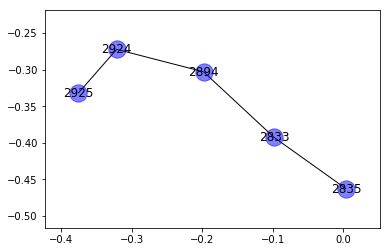

In [14]:
pos = nx.spring_layout(G_2018)
B = nx.dijkstra_path(G_2018,source=2835, target=2925)
nx.draw_networkx_nodes(G_2018, pos=pos, nodelist = B, node_color = 'b', alpha = 0.5)
locC = G_2018.subgraph(B)
nx.draw_networkx_edges(locC,pos=pos, edgelist = locC.edges())
nx.draw_networkx_labels(locC, pos=pos, font_size = 12)
# same thing, different dataset, different SUs, change 'G_all' for 'G_2018' and change your 'source' and 'target' values.

{2936: Text(-0.232529,0.272235,'2936'),
 2851: Text(-0.224361,0.188297,'2851'),
 2902: Text(-0.214191,0.322241,'2902'),
 2935: Text(-0.187057,0.30312,'2935')}

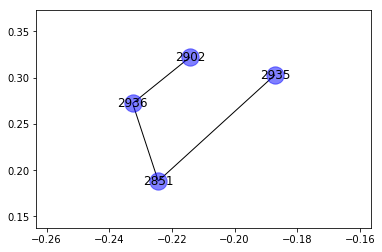

In [15]:
pos = nx.spring_layout(G_all)
B = nx.dijkstra_path(G_all,source=2935, target=2902)
nx.draw_networkx_nodes(G_all, pos=pos, nodelist = B, node_color = 'b', alpha = 0.5)
h = G_all.subgraph(B)
nx.draw_networkx_edges(G_all,pos=pos, edgelist = h.edges())
nx.draw_networkx_labels(h, pos=pos, font_size = 12)

In [16]:
approx.local_node_connectivity(G_all, source=2115, target=2161)
# How interconnected are these SUs? local node connectivity is the minimum number of nodes that must be removed to disconnect them.
# Higher numbers mean more interconnections

1

In [17]:
sorted(nx.common_neighbors(G_all, 2029,2030))
# What neighbour SUs are shared on the matrix graph? A neighbour is a SU one step away on the matrix graph. 
# 2029 and 2030 are connected via 2018 and via 2026

[2018, 2026]

In [18]:
nx.number_connected_components(G_all)
nx.info(G_all,2030)
# How many direct neighbours does the SU have, and what are those neighbour SUs?

'Node 2030 has the following properties:\nDegree: 3\nNeighbors: 2027 2026 2018'